### code for a simple implementation of lin reg without nn.module

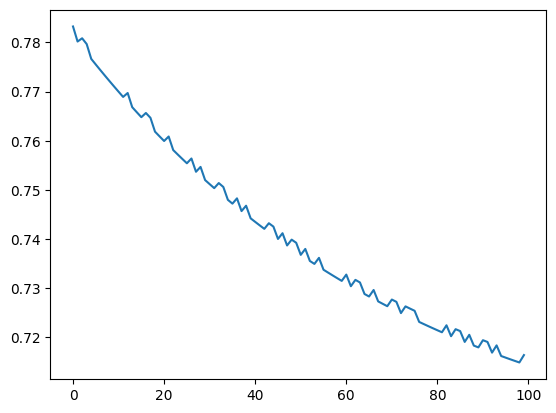

In [60]:
# import torch
# import matplotlib.pyplot as plt

# x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
# y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

# class LinearRegression:
#     def __init__(self, lr):
#         self.w = torch.tensor([1.0], requires_grad=True)
#         self.b = torch.tensor([1.0], requires_grad=True)
#         self.lr = lr

#     def forward(self, x):
#         return self.w * x + self.b

#     def update(self):
#         with torch.no_grad():  # We only need PyTorch to track operations for computing gradients, not for updating parameters.
#             self.w -= self.lr * self.w.grad
#             self.b -= self.lr * self.b.grad

#     def reset_grad(self):
#         self.w.grad.zero_()
#         self.b.grad.zero_()

# def criterion(y_true, y_pred):
#     return (y_true - y_pred) ** 2 

# model = LinearRegression(lr=0.0005)
# loss_list = []

# for epoch in range(100):
#     total_loss = 0

#     for j in range(len(x)):  
#         y_pred = model.forward(x[j]) 
#         loss = criterion(y[j], y_pred)  
#         total_loss += loss  
#         loss.backward()
    
#     total_loss /= len(x)
#     loss_list.append(total_loss.item())

#     model.update() 
#     model.reset_grad() 

# plt.plot(loss_list)
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training Loss")
# plt.show()




import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)  # Reshape to (4,1)

class FFN(nn.Module):
    def __init__(self,lr):
        super(FFN,self).__init__()
        self.linear1 = nn.Linear(2,2,bias=True)
        self.sig = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias=True)
        self.optim = torch.optim.SGD(self.parameters(), lr = lr)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.sig(x)
        x = self.linear2(x)
        x = self.sig(x)
        return x
    
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self,i):
        return self.x[i],self.y[i]


full_dataset = MyDataset(x,y)
data_loader = DataLoader(full_dataset,batch_size=2,shuffle=True)
criterion = nn.BCELoss()
model = FFN(0.01)
epoch = 200
loss_list = []
for epoch in range(100):
    model.train()
    total_loss = 0  # Track loss per epoch

    for inputs, labels in data_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        model.optim.zero_grad()  # Reset gradients before backpropagation
        loss.backward()  # Compute gradients
        model.optim.step()  # Update weights

        total_loss += loss.item()  # Accumulate batch losses

    loss_list.append(total_loss / len(data_loader))  # Store average loss per epoch

plt.plot(loss_list)
plt.show()


### using SGD optmiser

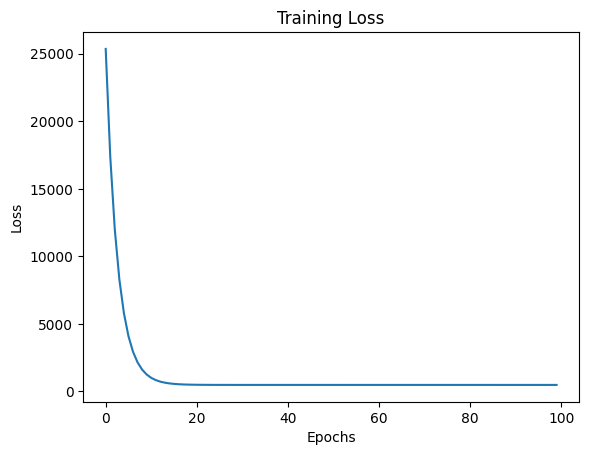

In [ ]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

class LinearRegression:
    def __init__(self, lr):
        self.w = torch.tensor([1.0], requires_grad=True)
        self.b = torch.tensor([1.0], requires_grad=True)
        self.lr = lr
        self.optimizer = torch.optim.SGD([self.w, self.b], lr=self.lr)

    def forward(self, x):
        return self.w * x + self.b

def criterion(y_true, y_pred):
    return (y_true - y_pred) ** 2  # Squared error

# Initialize model
model = LinearRegression(lr=0.0005)
loss_list = []

for epoch in range(100):
    total_loss = 0

    for j in range(len(x)):  
        y_pred = model.forward(x[j])  # Forward pass
        loss = criterion(y[j], y_pred)  # Compute loss
        total_loss += loss  # Accumulate loss
    
    total_loss /= len(x)  # Compute mean loss
    loss_list.append(total_loss.item())

    # Zero out gradients before backward pass
    model.optimizer.zero_grad()
    total_loss.backward()  # Compute gradients
    model.optimizer.step()  # Update parameters

# Plot loss curve
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


### using nn.module

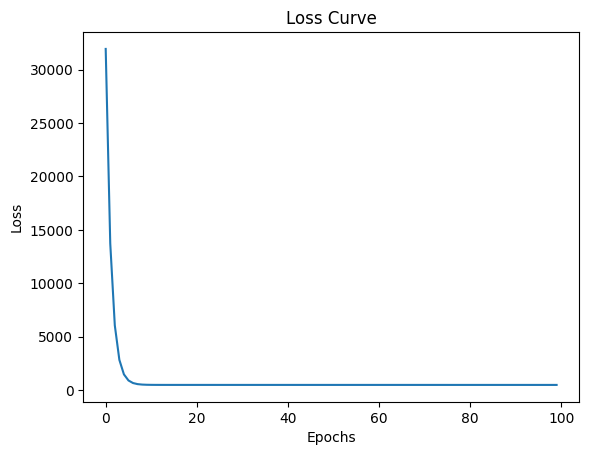

Learned weight: 12.93326473236084
Learned bias: 0.9493790864944458


In [6]:
import torch.nn as nn
import torch.optim as optim

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0]).view(-1, 1)  # this converts the expression to (5,1) instead of (5,)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0]).view(-1, 1)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1) 

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []

for epoch in range(100):
    model.train() # this is the in-built function to train the model

    y_pred = model(x) # calls the forward method
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

print("Learned weight:", model.linear.weight.item())
print("Learned bias:", model.linear.bias.item())

### logistic regression using nn.module

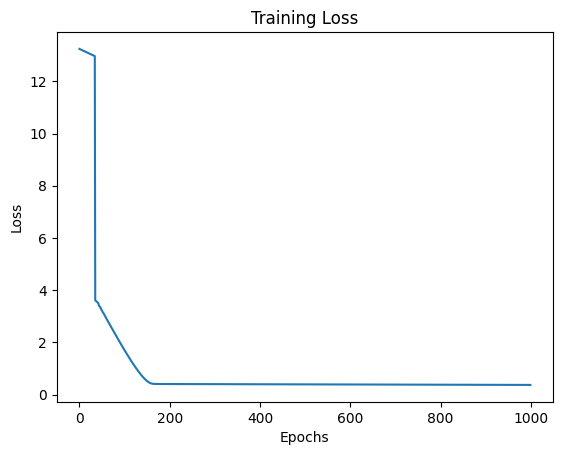

Learned weight (w): 0.04146237671375275
Learned bias (b): -0.6742695569992065
Predicted probability for input 30: 0.6387


In [12]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).view(-1, 1).float()  # Features
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).view(-1, 1).float()  # Target labels

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # sigmoid activation


model = LogisticRegression()
criterion = nn.BCELoss() # note mse wont work
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_list = []

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()

    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

with torch.no_grad():
    y_pred_final = model(X)


print("Learned weight (w):", model.linear.weight.item())
print("Learned bias (b):", model.linear.bias.item())

test_input = torch.tensor([[30.0]]).float()
predicted_prob = model(test_input).item()
print(f"Predicted probability for input 30: {predicted_prob:.4f}")


### using a dataset class to hold data

Using device: cpu


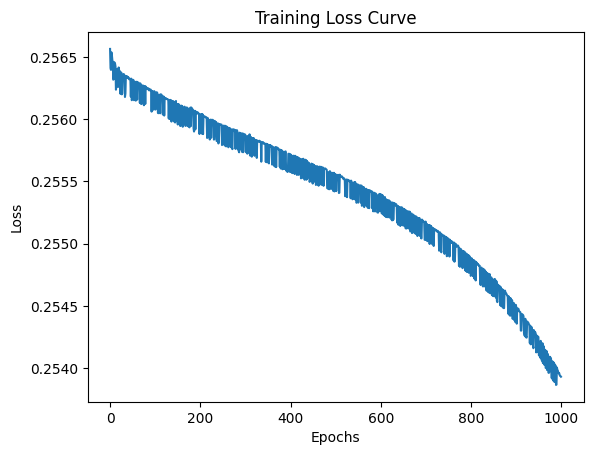

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import matplotlib.pyplot as plt

# Define XOR input and output with correct shape
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)  # Reshape to (4,1)

# Define the neural network model
class XORproblem(nn.Module):
    def __init__(self):
        super(XORproblem, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.Sigmoid()  # Added sigmoid for binary classification

    def forward(self, x):  
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)  # Apply sigmoid to final output
        return x

# Custom dataset class
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

batch_size = 1
full_dataset = MyDataset(X, Y)
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

model = XORproblem().to(device)
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
loss_list = []

for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    
    for input, labels in train_data_loader:
        input, labels = input.to(device), labels.to(device) 

        optimizer.zero_grad()
        output = model(input)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    loss_list.append(total_loss / len(train_data_loader))

# Plot loss curve
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

### feed forward network

In [ ]:
# import torch.optim as optim
# from sklearn.metrics import confusion_matrix
# from torchvision import datasets, transforms
# from torch.utils.data import DataLoader
# import torch.nn as nn
# import torch

# class FeedForwardNN(nn.Module):
#     def __init__(self):
#         super(FeedForwardNN, self).__init__()
#         self.fc1 = nn.Linear(28*28, 128) 
#         self.fc2 = nn.Linear(128, 64)   
#         self.fc3 = nn.Linear(64, 10)     
#         self.relu = nn.ReLU()

#     def forward(self, x):
#         x = x.view(-1, 28*28)  
#         x = self.relu(self.fc1(x))  
#         x = self.relu(self.fc2(x))  
#         x = self.fc3(x)  # No softmax here
#         return x  # Raw logits

# device = 'cpu'

# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# print(f"Total training samples: {len(train_dataset)}")
# print(f"Total testing samples: {len(test_dataset)}")
# print(f"Image shape: {train_dataset[0][0].shape}")  
# print(f"Unique labels: {set(train_dataset.targets)}") 


# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# model = FeedForwardNN().to(device)
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# epochs = 5
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
        
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         running_loss += loss.item()
    
#     print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# model.eval()
# all_preds = []
# all_labels = []
# with torch.no_grad():
#     for inputs, labels in test_loader:
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs, 1)
#         all_preds.extend(predicted.numpy())
#         all_labels.extend(labels.numpy())

# conf_matrix = confusion_matrix(all_labels, all_preds)

# print('Confusion Matrix')
# print(conf_matrix)

# num_params = sum(p.numel() for p in model.parameters())
# print(f"Total number of learnable parameters in the model: {num_params}")


import torch
import torch.nn as nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from sklearn.metrics import confusion_matrix

class FFN(nn.Module):
    def __init__(self):
        super(FFN,self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self,x):
        x = x.view(-1,28*28)
        return self.layers(x)
    
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset = datasets.MNIST(root="./data", download = True, train=True, transform = transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model = FFN()
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.CrossEntropyLoss()
EPOCHS = 5
loss_list = []

for _ in range(EPOCHS):
    total_loss = 0
    model.train()
    for input, label in train_loader:
        input = input.to("cpu")
        label = label.to("cpu")
        output = model(input)
        loss = criterion(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    total_loss = total_loss/len(data_loader)
    loss_list.append(total_loss)
    print(f"The loss is {total_loss}")

test_dataset = datasets.MNIST(root="./data", download = True, train=False, transform = transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for input,label in test_loader:
        input = input.to("cpu")
        label = label.to("cpu")
        output = model(input)
        _,pred = torch.max(output,1)
        all_labels.extend(label.numpy())
        all_preds.extend(pred.numpy())

cm = confusion_matrix(all_labels,all_preds)
print(cm)


Total training samples: 60000
Total testing samples: 10000
Image shape: torch.Size([1, 28, 28])
Unique labels: {tensor(3), tensor(4), tensor(3), tensor(1), tensor(3), tensor(6), tensor(9), tensor(4), tensor(1), tensor(2), tensor(5), tensor(0), tensor(6), tensor(0), tensor(5), tensor(1), tensor(6), tensor(4), tensor(7), tensor(9), tensor(3), tensor(0), tensor(0), tensor(4), tensor(3), tensor(8), tensor(2), tensor(6), tensor(4), tensor(2), tensor(1), tensor(6), tensor(7), tensor(3), tensor(5), tensor(5), tensor(1), tensor(5), tensor(0), tensor(5), tensor(7), tensor(1), tensor(6), tensor(6), tensor(6), tensor(0), tensor(9), tensor(4), tensor(1), tensor(8), tensor(4), tensor(3), tensor(3), tensor(6), tensor(2), tensor(9), tensor(7), tensor(6), tensor(0), tensor(2), tensor(9), tensor(9), tensor(4), tensor(3), tensor(9), tensor(6), tensor(6), tensor(6), tensor(2), tensor(2), tensor(5), tensor(8), tensor(1), tensor(1), tensor(7), tensor(2), tensor(4), tensor(2), tensor(1), tensor(1), tensor(9

### cnn

Epoch [1/5], Loss: 0.2974
Epoch [2/5], Loss: 0.0921
Epoch [3/5], Loss: 0.0677
Epoch [4/5], Loss: 0.0553
Epoch [5/5], Loss: 0.0472
[[ 970    0    2    1    0    1    1    1    4    0]
 [   0 1122    0    3    1    0    2    3    4    0]
 [   0    1 1013    4    1    0    2    7    4    0]
 [   0    0    0 1001    0    3    0    3    3    0]
 [   0    0    1    0  972    0    3    0    1    5]
 [   2    0    0   11    0  870    1    0    7    1]
 [   2    2    0    1    1    3  945    0    4    0]
 [   0    0    6    2    0    0    0 1018    1    1]
 [   4    0    3    1    1    3    0    4  957    1]
 [   1    2    0    5   11    5    0    9    4  972]]


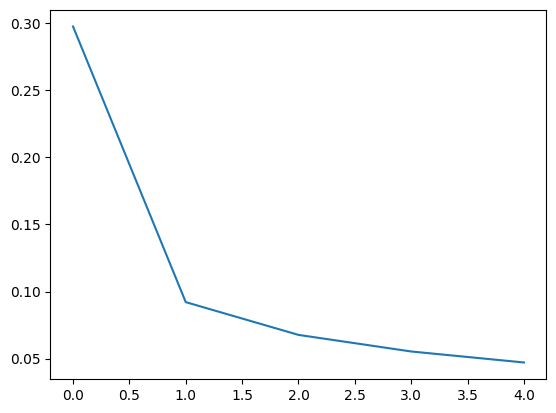

In [4]:
# import torch
# from torch import nn
# from torch.optim import Adam
# from torch.utils.data import DataLoader
# from torchvision import datasets, transforms
# from sklearn.metrics import confusion_matrix

# transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
# train_dataset = datasets.MNIST(root="data", download=True, train=True, transform=transform)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# class ImageClassifier(nn.Module):
#     def __init__(self):
#         super(ImageClassifier, self).__init__()
#         self.conv_layers = nn.Sequential(
#             nn.Conv2d(1, 32, kernel_size=3),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size=3),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, kernel_size=3),
#             nn.ReLU()
#         )
#         self.fc_layers = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(64 * 22 * 22, 10)
#         )

#     def forward(self, x):
#         x = self.conv_layers(x)
#         x = self.fc_layers(x)
#         return x

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# classifier = ImageClassifier().to(device)
# optimizer = Adam(classifier.parameters(), lr=0.001)
# loss_fn = nn.CrossEntropyLoss()

# for epoch in range(10):  
#     classifier.train()  
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)
#         optimizer.zero_grad()  
#         outputs = classifier(images)  
#         loss = loss_fn(outputs, labels)  
#         loss.backward()  
#         optimizer.step()  

#     print(f"Epoch: {epoch}, Loss: {loss.item()}")

# classifier.eval() 
# test_dataset = datasets.MNIST(root="data", download=True, train=False, transform=transform)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = classifier(images)
#         _, predicted = torch.max(outputs, 1)
#         all_preds.extend(predicted.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())

# # Confusion Matrix
# cm = confusion_matrix(all_labels, all_preds)
# print("Confusion Matrix:")
# print(cm)

# total_params = sum(p.numel() for p in classifier.parameters() if p.requires_grad)
# print(f"Total number of learnable parameters: {total_params}")

device = "cpu"

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(64,64,kernel_size=3),
            nn.ReLU(),
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*22*22,10)
        )

    def forward(self,x):
        x = self.conv_layer(x)
        x = self.fc_layer(x)
        return x
    
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
train_dataset = datasets.MNIST(root="./data", download=True, train=True, transform=transform)
train_loader = DataLoader(train_dataset , batch_size=32, shuffle=True)
criterion = nn.CrossEntropyLoss()
model = CNN()
optimizer = optim.SGD(model.parameters(),lr=0.01)

EPOCHS= 5
loss_list = []

for epoch in range(EPOCHS):
    total_loss = 0
    model.train()

    for input, label in train_loader:
        input, label = input.to(device), label.to(device)

        # Forward Pass
        output = model(input)
        loss = criterion(output, label)

        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    loss_list.append(total_loss / len(train_loader))  # Store average loss per epoch
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {loss_list[-1]:.4f}")


all_pred = []
all_labels = []

test_dataset = datasets.MNIST(root="./data", download=True, train=False, transform=transform)
test_loader = DataLoader(test_dataset , batch_size=32, shuffle=True)
model.eval()
with torch.no_grad():
    for input, label in test_loader:
        input = input.to("cpu")
        label = label.to("cpu")
        output = model(input)
        _,pred = torch.max(output,1)
        all_pred.extend(pred.numpy())
        all_labels.extend(label.numpy())

cm = confusion_matrix(all_labels,all_pred)
print(cm)

plt.plot(loss_list)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

# Define transformations for MNIST to fit AlexNet input size and channels
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel RGB
    transforms.Resize((224, 224)),  # Resize MNIST images to match AlexNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pretrained AlexNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.alexnet(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)  # Modify final layer for 10 output classes (MNIST)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 5
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)


### saving and checkpointing

In [ ]:
import torch
import torch.nn as nn

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
model = SimpleNN()

# Save the entire model
torch.save(model, "model.pth")

# # Load the entire model
# loaded_model = torch.load("model.pth")
# loaded_model.eval()  # Set to evaluation mode

# print(loaded_model)

# Save only the model's parameters (recommended)
torch.save(model.state_dict(), "model_state.pth")

# Load the model's state
loaded_model = SimpleNN()  # Initialize a new model
loaded_model.load_state_dict(torch.load("model_state.pth"))
loaded_model.eval()  # Set to evaluation mode

print(loaded_model)


# Define model and optimizer
model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch = 5
loss = 0.35  # Example loss

# Save checkpoint
checkpoint = {
    "epoch": epoch,
    "model_state": model.state_dict(),
    "optimizer_state": optimizer.state_dict(),
    "loss": loss
}
torch.save(checkpoint, "checkpoint.pth")
print("Checkpoint saved!")


UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL __main__.SimpleNN was not an allowed global by default. Please use `torch.serialization.add_safe_globals([SimpleNN])` or the `torch.serialization.safe_globals([SimpleNN])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.